# The Central Limit Theorem and Estimation of the Mean

**Definition.** For a fixed population and fixed sample size, the collection of all possible values of the mean over all possible samples of that size, forms what we call the **sampling distribution**.

Two vital theorems govern how these sampling distributions work:

1. **Central Limit Theorem.** The means of a sampling distribution are approximately normal (bell-shaped) and centered upon $\mu_0$, the population average.
2. **Law of Large Numbers.** As n increases, our estimates based upon the sample means increase in accuracy.

Thus, the CLT guarantees a bell-shaped distribution centered upon the population average, and the Law of Large Numbers works like a lever that allows us to control the accuracy. Increased sample sizes lead to increased accuracy.

## Data Sets

We will need some data to work with:

In [1]:
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')

We also need for the function **sample.data.frame()** to be active in this notebook, so we copy-paste it from our [online course notes](https://straightdraw.github.io/probstat/S1c.html).

In [4]:
sample.data.frame <- function(x, size, replace = FALSE, prob = NULL, groups=NULL, 
                              orig.ids = TRUE, fixed = names(x), shuffled = c(),
                              invisibly.return = NULL, ...) {
  if( missing(size) ) size = nrow(x)
  if( is.null(invisibly.return) ) invisibly.return = size>50 
  shuffled <- intersect(shuffled, names(x))
  fixed <- setdiff(intersect(fixed, names(x)), shuffled)
  n <- nrow(x)
  ids <- 1:n
  groups <- eval( substitute(groups), x )
  newids <- sample(n, size, replace=replace, prob=prob, ...)
  origids <- ids[newids]
  result <- x[newids, , drop=FALSE]
  
  idsString <- as.character(origids)
  
  for (column in shuffled) {
    cids <- sample(newids, groups=groups[newids])
    result[,column] <- x[cids,column]
    idsString <- paste(idsString, ".", cids, sep="")
  }
  
  result <-  result[ , union(fixed,shuffled), drop=FALSE]
  if (orig.ids) result$orig.id <- idsString
  
  
  if (invisibly.return) { return(invisible(result)) } else {return(result)}
}


## Example: Estimating Airport Elevation

Let's work with an example from the **airports** data set: **elevation_ft**. Let's generate many, many samples of the same size. We'll find the averages from each sample and use them to estimate the average level of narcissism for students at UNG.

### First Step: Generating Samples of Size $n=10$

Let's beging with the R commands necessary to sample the **Narc** column in the *personality* data frame. We will use the

<p style="color:red;">sample.data.frame()</p>

function to draw a sample.

**Run the cell below to see how this works, and notice:**

- The function inputs:
1. Name of the data frame to sample from.
2. Sample size to be drawn.
- The output: 10 rows from the data frame with all columns present.

In [5]:
s <- sample.data.frame(airports, 10, orig.ids = FALSE)
head(s,15)

name                                 code type           elevation_ft
10641 Whitfield Regional Hospital Heliport AL14 heliport        156        
2538  Flint Ridge Airport                  22NC small_airport   650        
37191 Schlip Kalkrand1 Landing Site             small_airport  4606        
15584 Kelvington Airport                   CKV2 small_airport  1860        
4982  Mc David Ranch Airport               44TS small_airport  1407        
46488 San Juan Estancias Airport                small_airport   820        
55265 Benambra Airport                          small_airport  2200        
56169 Narrandera Airport                        medium_airport  474        
3633  El Caballero Airport                 2XA1 small_airport   317        
7833  Ibm Distribution Center Heliport     72PN heliport        454        
      continent country region city         lat       long      
10641 NA        US      US-AL  Demopolis     32.50571  -87.83640
2538  NA        US      US-NC  Siler City    35.82110  -79.46830
37191 AF        NA      NA-HA  Schlip       -24.00190   16.89420
15584 NA        CA      CA-SK  Kelvington    52.13330 -103.53500
4982  NA        US      US-TX  Llano         30.57770  -98.83370
46488 SA        BO      BO-B   Cercado      -14.16667  -64.76667
55265 OC        AU      AU-VIC              -36.96687  147.69914
56169 OC        AU      AU-NSW Narrandera   -34.70220  146.51199
3633  NA        US      US-TX  Cotulla       28.13240  -98.93220
7833  NA        US      US-PA  New Kingston  40.22790  -77.08860

We can find the average elevation above sea level for these 10 airports by subsetting our sample data frame **s**.

In [7]:
mean(s[ , 'elevation_ft'])

[1] 1294.4

**Putting it Together.** Eventually, we want to run a loop that does this a thousand or more times. Thus, we prefer a single line of code that will do it for us all at once. We wrap the *sample.data.frame()* function inside the *mean* function as shown below.

**Run the code below multiple times to see how we're sampling plus finding the average Narcissism level for each.**

In [9]:
mean(sample.data.frame(airports, 10, orig.ids = F)[ , 'elevation_ft'])

[1] 668

### Step 2: Creating a for Loop

The steps make sense if we consider them separately:

1. Create **all_means**, an initially empty vector where we plan to store our sample means.
2. Create a for loop that will a thousand times.
3. Inside the loop, we will:
  - Gather a sample of size $n=10$.
  - Calcuate the mean.
  - Add this value to the **all_means** vector.

In [18]:
all_means <- c()                                         #Empty vector to store all the sample means
for (count in 1:1000){
    sample <- sample.data.frame(airports, 10, orig.ids = F)     #Generate a sample (size n=10)
    all_means[count] <- mean(sample[ , 'elevation_ft'])          #Save the mean of this sample in my list
}

Notice that we now have a vector **all_means**, so we display the distribution in a histogram and caculate various statistics.

The grand mean from the simulation =  1268.239

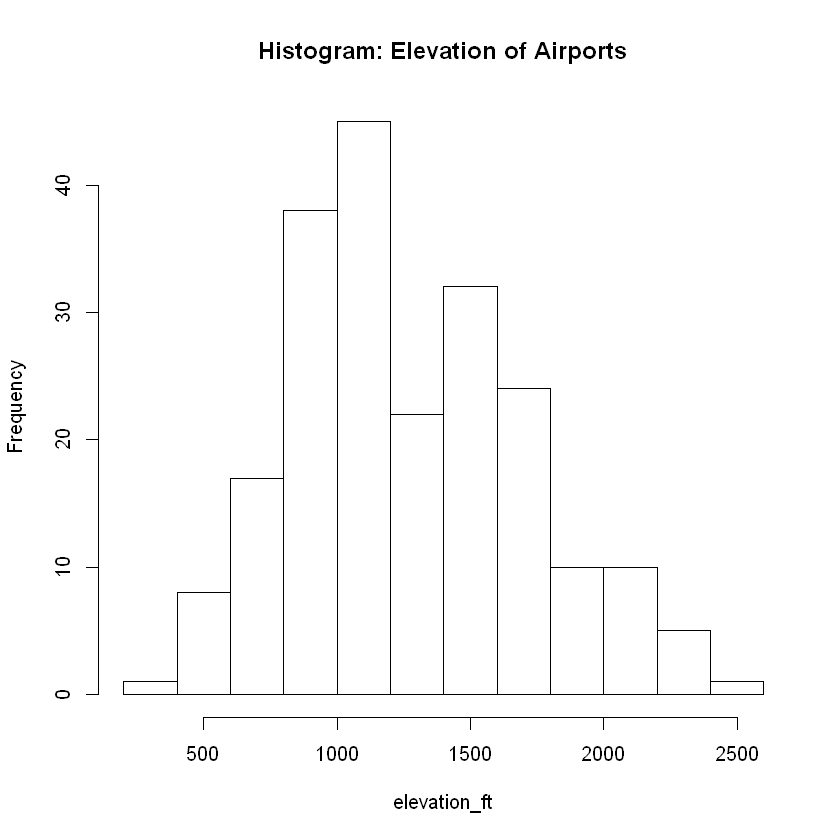

In [36]:
cat('The grand mean from the simulation = ', mean(na.omit(all_means)))
hist(all_means, main = 'Histogram: Elevation of Airports', xlab = 'elevation_ft')

### Step 3: The Middle 90% of the Distribution

Because we intend to use the sampling distributions to estimate the population average, we need a way to gather an interval. This interval will be our estimated range of values. For the moment, let's use the **middle 90%** of the **all_means** vector. We will need the endpoints, e.g. the 5th and 95th percentiles from the vector.

```{tip}
Notice the function **na.omit**. When the data vector has too many undefined values, the statistical functions sometimes fail. We can circumvent this behavior by omitting the NA values in the data vector.
```

In [37]:
lower <- quantile(na.omit(all_means), prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(na.omit(all_means), prob = 0.95)     # Calcuate the 95th percentile.
cat('The middle 90% of the all_means vector is (',lower,',',upper,').')

The middle 90% of the all_means vector is ( 631 , 2053.12 ).

### Step 4: The Histogram with Vertical Lines Showing the 5th and 95th Percentiles

We use the function **abline()** to superimpose vertical lines onto our histogram. We've already calculated the values for the 5th and 95th percentiles. We need only to use the option **v** which draws a *vertical line* at the value indicated. The color option is not vital for our purposes, but a splash of color is visually appealing.

As we go forward, we will see that increased sample size will lead to a narrower bell-shape. In other words, the size of the standard deviation will become important, so let's include that in the text we print out using the **cat()** function.

The grand mean from the simulation =  1268.239 
The middle 90% of the sampling distribution: is ( 631 , 2053.12 ).

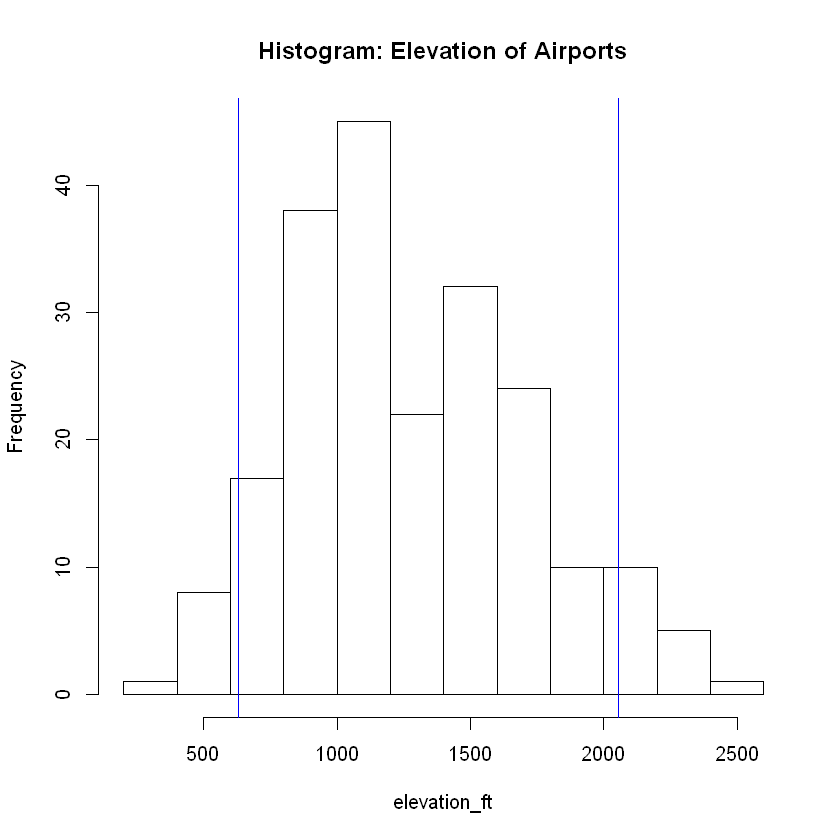

In [41]:
cat('The grand mean from the simulation = ', mean(na.omit(all_means)),'\nThe middle 90% of the sampling distribution: is (',lower,',',upper,').')
hist(all_means, main = 'Histogram: Elevation of Airports', xlab = 'elevation_ft')
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Step 5: Performing all Tasks in 1 Code Block

Now that we have unpacked each command line needed, we can put it all together into one code block. Doing so will help to quickly generate different sampling distributions for different sample sizes **n**.

The grand mean from the simulation =  1299.826 
The middle 90% of the sampling distribution: is ( 507.735 , 2372.975 ).

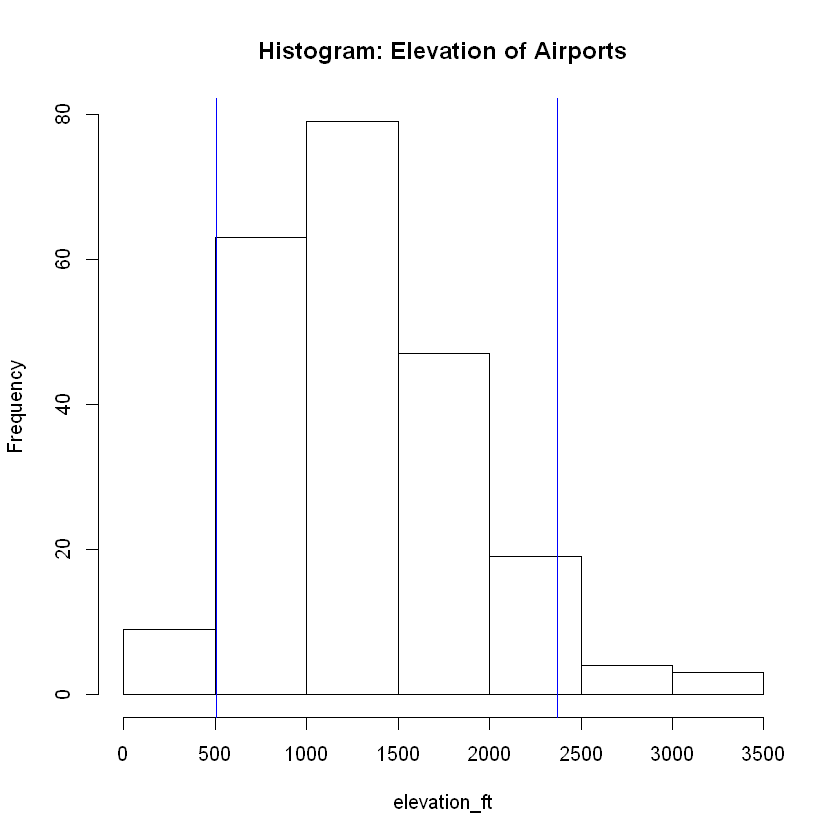

In [43]:
all_means <- c()                                           #Empty vector to store all the sample means

for (count in 1:1000){
    sample <- sample.data.frame(airports, 10, orig.ids = F)       #Controls sample size
    all_means[count] <- mean(sample[ , 'elevation_ft'])
}

upper <- quantile(na.omit(all_means), prob = 0.95)
lower <- quantile(na.omit(all_means), prob = 0.05)
cat('The grand mean from the simulation = ', mean(na.omit(all_means)),'\nThe middle 90% of the sampling distribution: is (',lower,',',upper,').')
hist(all_means, main = 'Histogram: Elevation of Airports', xlab = 'elevation_ft')
abline( v = lower, col="blue")
abline(v = upper, col="blue")

## Task

Let's increase the sample size. We will conduct the same simulation for sample sizes:

- 100
- 200
- 500
- 1000

After doing so, we will fill in the table below with the values we found:

<table class="center" style="width:80%; text-align:center;">
  <tr>
    <th>Repititions</th>
    <th>Sample Size</th> 
    <th>Grand Mean from Simulation </th>
    <th>Middle 90% of Simulated Data</th>
  </tr>
  <tr>
    <td>1,000</td>
    <td>100</td>
    <td>xx</td>
    <td>yy</td>
  </tr>
  <tr>
    <td>1,000</td>
    <td>200</td>
    <td>xx</td>
    <td>yy</td>
  </tr>
  <tr>
    <td>1,000</td>
    <td>500</td>
    <td>xx</td>
    <td>yy</td>
  </tr>
  <tr>
    <td>1,000</td>
    <td>1,000</td>
    <td>xx</td>
    <td>yy</td>
  </tr>
</table>

## Task 2

Using the **united** data frame, estimate the mean **Delay** in minutes for these flights.

## Task 3

Using the **births** data frame, estimate the mean **Birth.Weight** in ounces for the birth weights of the babies in the data frame.